In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [6]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 

[[-5.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.]
 [ 1. -6.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 1.  1. -4.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1. -5.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -5.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1. -4.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1. -6.  1.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  1. -5.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1. -4.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  1. -5.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1. -4.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1. -5.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1. -5.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1. -4.  1.  1.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1. -5. 

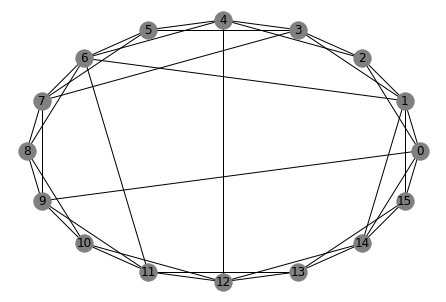

In [7]:
n, k = 16, 2
p = 0.2
G = nx.newman_watts_strogatz_graph(n,2*k,p)
clustering = nx.algorithms.average_clustering(G)
shorestPath = nx.average_shortest_path_length(G)
ma = matriz_acoplaminento(G)
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)
print("El coeficiente de agrupamiento es:",clustering)
print("El promedio del camino mas corto es:",shorestPath)

nx.draw_circular(G,**opts)
plt.show()

In [8]:
#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])

Los valores propios son:
[6.661338147750939e-16, -1.4173425696033655, -1.6200857949612952, -2.8440663199285163, -3.325462920009989, -4.657813055505816, -4.7310568650164475, -5.109300904762475, -5.160456131824632, -5.484642280963861, -5.762644912191356, -6.377902926408817, -6.815994535856637, -6.9115077892037995, -7.307540994469996, -8.474181999293018]
El valor propio Lamda2 es:
-1.4173425696033655
